# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\lakpa\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


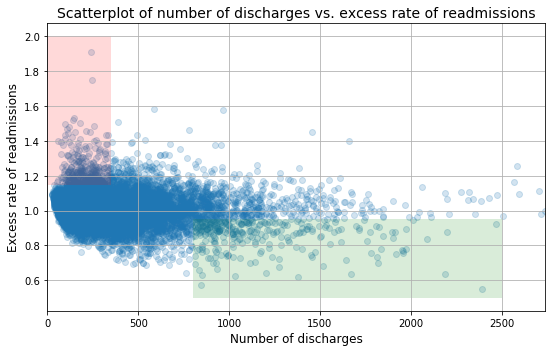

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Exercise:-

A. Do you agree with the above analysis and recommendations? Why or why not?

In [5]:
# Your turn

A. Initial observations based on the plot above
- Overall, rate of readmission is trending down with the increasing number of discharges.
- With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
- With higher number of discharges, there is a greater incidence of lower rates of readmissions(area shaded green)

Based on the plot only few incidence has higher rate of readmission, and most of the incidence has rate of readmissions between 0.8 to 1.2. The number of discharges does not significantly effect the excess rate of readmission. With both lower and higher number of discharge, the excess rate of readmission is between 0.8 to 1.2. 

In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


B. Statistics
- In hospitals/facilities with number of discharges<100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
- In hospitals/facilities with number of discharges<1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [7]:
discharge_greater_than100 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][clean_hospital_read_df['Number of Discharges'] <100]
discharge_greater_than100['Excess Readmission Ratio'].mean()

1.0226183501683506

In [8]:
np.sum(discharge_greater_than100['Excess Readmission Ratio']>1)/len(discharge_greater_than100) *100

59.18045705279747

Answer: In hospitals/facilities with number of discharges<100, mean excess readmission rate is 1.023 and 59.18% have excess readmission rate greater than 1.

In [9]:
discharge_greater_than1000 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][clean_hospital_read_df['Number of Discharges'] <1000]
discharge_greater_than1000['Excess Readmission Ratio'].mean()

1.0087305266020066

In [10]:
np.sum(discharge_greater_than1000['Excess Readmission Ratio']>1)/len(discharge_greater_than1000) *100

51.58358826705056

In hospitals/facilities with number of discharges<1000, mean excess readmission rate is 1.009 and 51.58% have excess readmission rate greater than 1.

C. Conclusions
- There is a significant correaltion between hospital capacity (number of discharges) and readmission rates.
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [11]:
hospital_capacity = clean_hospital_read_df['Number of Discharges']
readmission_rate = clean_hospital_read_df['Excess Readmission Ratio'].fillna(0)
np.corrcoef(hospital_capacity, readmission_rate)[0,1]

-0.004892144420094947

Answer: The Pearson correlation coefficient is -0.005 which is very close to zero for hospital capacity and readmission rates. This tells us that there is a very weak correaltion or almost no correlation or relationship between hospital capacity and readmission rates. 

D. Regulatory policy recommendations
- Hospitals/facilities with small capacity (<300) should be required to demostrate upgraded resource allocation for quality care to continue operation.
- Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. 

Answer: When we selected hospitals with small capacity, and calculated the correlation coefficient of hospital capacity and readmission rate, we found that there is a weak positive correaltion. This tells us that readmission rate is not related with hospital capacity, but other factors.


In [12]:
hospital_less300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<300]
hospital_capacity_less300 = hospital_less300['Number of Discharges']
readmission_rate_less300 = hospital_less300['Excess Readmission Ratio'].fillna(0)
np.corrcoef(hospital_capacity_less300, readmission_rate_less300)[0,1]

0.19766846198062113

In [13]:
hospital_more300 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=300]
hospital_capacity_more300 = hospital_more300['Number of Discharges']
readmission_rate_more300 = hospital_more300['Excess Readmission Ratio'].fillna(0)
np.corrcoef(hospital_capacity_more300, readmission_rate_more300)[0,1]

-0.07540710524089227

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Setup an appropriate hypothesis test.

In [14]:
#H0: There is no significant correlation.
#Ha: There is a correlation.

#function to calculate the pearson's r
def pearson_r(x,y):
    ''' Compute Pearson's correlation 
    coefficient between two arrays.'''
    #Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    #return entry[0,1]
    return corr_mat[0,1]

In [15]:
np.random.seed(1)
# Compute observed correlation: r_obs
r_obs = pearson_r(hospital_capacity, readmission_rate)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute hospital_capacity measurments: hospital_capacity_permuted
    hospital_capacity_permuted = np.random.permutation(hospital_capacity)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(hospital_capacity_permuted, readmission_rate)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.6964


p-value = 0.6964. The p-value is greater than level of significance 0.01, so we fail to reject the null hypothesis. 

In [16]:
#H0: population_correlation_coefficient = 0
#i.e There is no correlation.
#Ha: population_correlation_coefficient != 0  
#i.e There is a 
#alpha = 0.01
#First, Pearson's r-Hypothesis Testing
#degree of freedom = 11578-2 = 11576
#Crital correlation value (r-value) for n = 11578, and alpha 0.01 for two tailed test is 0.024
#If calculated r is greater than 0.024, reject the null hypothesis
n = len(hospital_capacity)
r = pearson_r(hospital_capacity, readmission_rate)
r

-0.004892144420094947

We do not reject null hypothesis, because the absoulte calculated correlation value 0.005 is less than absolute critical correlation value 0.024.

In [17]:
#Now, testing the significance of a correlation coefficient
#Assuming null hypothesis is true
p=0
t = (r-p) / np.sqrt((1-(r**2))/(n-2))
t

-0.5263610267356826

-2.58 is the t-value for degree of freedom 11577 and alpha 0.01.

We do not reject the null hypothesis, because the absolute calculated t-value is less than the absolute critical t-value at 1% level of significance.

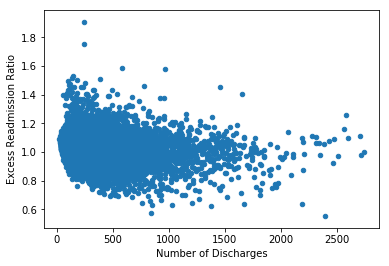

In [18]:
clean_hospital_read_df[81:-3].plot.scatter(x='Number of Discharges', y='Excess Readmission Ratio')

slope = -2.8565052943822905e-05 readmission_rate / hospital_capacity
intercept = 1.0179475579544215 hospital_capacity


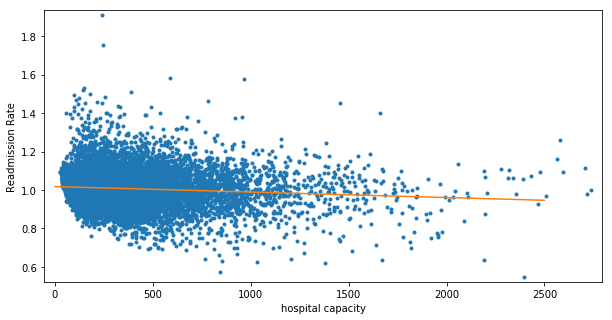

In [19]:
_ = plt.subplots(figsize=(10,5))
# Plot the illiteracy rate versus fertility
_ = plt.plot(hospital_capacity[81:-3], readmission_rate[81:-3], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('hospital capacity')
_ = plt.ylabel('Readmission Rate')
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(hospital_capacity[81:-3], readmission_rate[81:-3],1)
# Print the results to the screen
print('slope =', a, 'readmission_rate / hospital_capacity')
print('intercept =', b, 'hospital_capacity')
# Make theoretical line to plot
x = np.array([0,2500]) #array consists of 0 and 2500
y = a * x + b
# Add regression line to your plot
_ = plt.plot(x, y)
# Draw the plot
plt.show()